LABML05
#1. Analise os dados do seguinte dataset.
    #url="https://raw.githubusercontent.com/masterfloss/data/main/dadosMundo.csv" 
    #df=pd.read_csv(url)
    
#2. Identifique grupos de países com características idênticas.
    # Reduza o número de variáveis através de PCA
    # Crie os clusters com as novas dimensões estimadas
    
#3. Identifique possíveis relações causais e crie regressão.



In [4]:

import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

url="https://raw.githubusercontent.com/masterfloss/data/main/dadosMundo.csv"
df=pd.read_csv(url)

In [6]:
df.head()

,Country,Area_km2,Population,Birth rate(births/1000 population),Death rate(deaths/1000 population),Electricity – consumption(kWh) per capita,Electricity – production(kWh) per capita,GDPpercapita,GDP - real growth rate(%),Industrial production growth rate(%),...,Internet users in the per 1000 people,Investment (gross fixed)(% of GDP),Life expectancy at birth(years),MilitPercentGDP,Oil – consumption(bbl/day) per 1000 persons,Public debt(% of GDP),Telephones - main lines in use per capita,Telephones - mobile cellular per capita,Total fertility rate(children born/woman),Unemploy rate(%)
0,Afghanistan,647500,29928987.0,47.02,20.75,21.791583,18.042709,800.0,7.5,NaN,...,0.033412,NaN,42.90,2.60,0.116943,NaN,0.001106,0.000501,6.75,NaN
1,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,28748,3563112.0,15.08,5.12,1897.217938,1594.112113,4900.0,5.6,3.1,...,8.419606,18.4,77.24,1.49,2.104902,NaN,0.071567,0.308719,2.04,14.8
3,Algeria,2381740,32531853.0,17.13,4.60,725.750236,791.839309,6600.0,6.1,6.0,...,15.369552,26.2,73.00,3.20,6.424473,37.4,0.067614,0.044489,1.92,25.4
4,American Samoa,199,57881.0,23.13,3.33,2088.768335,2245.987457,8000.0,NaN,NaN,...,NaN,NaN,75.84,NaN,65.651941,NaN,0.259152,0.041067,3.25,6.0


In [7]:
df.describe()


,Area_km2,Population,Birth rate(births/1000 population),Death rate(deaths/1000 population),Electricity – consumption(kWh) per capita,Electricity – production(kWh) per capita,GDPpercapita,GDP - real growth rate(%),Industrial production growth rate(%),Infant mortality rate(deaths/1000 live births),...,Internet users in the per 1000 people,Investment (gross fixed)(% of GDP),Life expectancy at birth(years),MilitPercentGDP,Oil – consumption(bbl/day) per 1000 persons,Public debt(% of GDP),Telephones - main lines in use per capita,Telephones - mobile cellular per capita,Total fertility rate(children born/woman),Unemploy rate(%)
count,2.630000e+02,2.380000e+02,225.000000,225.000000,215.000000,213.000000,230.000000,212.000000,164.000000,225.000000,...,216.000000,146.000000,225.000000,165.000000,211.000000,108.000000,231.000000,220.000000,225.000000,192.000000
mean,5.849875e+05,2.900494e+07,22.146667,9.374267,2943.318363,3168.714688,10552.760870,4.777830,5.578659,35.357733,...,144.766034,21.718493,67.692578,2.579697,32.534698,55.896296,0.243800,0.290439,2.937778,15.254688
std,1.881416e+06,1.175456e+08,11.126969,4.969136,3858.845584,4189.045728,11104.610351,5.284541,5.504898,35.344572,...,170.625278,8.068423,12.070613,2.359239,114.619416,36.954000,0.247137,0.305172,1.556919,15.113801
min,0.000000e+00,4.600000e+01,7.230000,2.300000,7.393216,8.965928,400.000000,-8.200000,-10.000000,2.290000,...,0.033412,8.000000,33.870000,0.110000,0.116943,2.100000,0.000166,0.000501,0.910000,0.000000
25%,5.130000e+02,2.837770e+05,12.570000,6.070000,308.489558,342.448249,2000.000000,2.300000,2.575000,8.030000,...,13.607755,17.225000,62.490000,1.200000,2.854016,31.475000,0.035526,0.037275,1.750000,5.575000
50%,4.884500e+04,4.440570e+06,18.780000,8.000000,1498.792235,1625.258550,5900.000000,4.000000,4.650000,20.970000,...,61.173356,19.800000,71.770000,1.890000,11.994920,50.750000,0.162675,0.167942,2.370000,10.500000
75%,3.339475e+05,1.628023e+07,30.010000,11.260000,4373.556147,4953.608125,16700.000000,6.000000,8.000000,55.510000,...,242.679977,24.400000,77.030000,3.100000,33.065271,69.675000,0.405438,0.487525,3.930000,19.625000
max,1.707520e+07,1.306314e+09,48.300000,29.360000,25921.944348,27873.167148,58900.000000,52.300000,30.000000,191.190000,...,657.147575,65.100000,83.510000,14.600000,1506.240138,228.300000,1.385120,1.159600,6.840000,90.000000


In [8]:
df.shape

(263, 22)

In [10]:
df.dtypes

Country,Area_km2,Population,Birth rate(births/1000 population),Death rate(deaths/1000 population),Electricity – consumption(kWh) per capita,Electricity – production(kWh) per capita,GDPpercapita,GDP - real growth rate(%),Industrial production growth rate(%),Infant mortality rate(deaths/1000 live births),Inflation rate (consumer prices)(%),Internet users in the per 1000 people,Investment (gross fixed)(% of GDP),Life expectancy at birth(years),MilitPercentGDP,Oil – consumption(bbl/day) per 1000 persons,Public debt(% of GDP),Telephones - main lines in use per capita,Telephones - mobile cellular per capita,Total fertility rate(children born/woman),Unemploy rate(%)    object
dtype: object

In [10]:

X=df.dropna()

In [11]:
X.shape

(93, 22)

In [17]:

X1=X.drop(['Country'], axis=1)

In [18]:
X.shape

(93, 22)

In [21]:
model=StandardScaler()


In [22]:
df1=model.fit_transform(X1)

In [23]:
df1

array([[ 0.83458209, -0.14294842, -0.15357443, ..., -1.0955458 ,
        -0.41538325,  1.07449879],
       [ 1.04376612, -0.10324871, -0.17948512, ..., -0.73277848,
        -0.18729943,  0.15962497],
       [ 3.71591218, -0.21344717, -0.70220509, ...,  0.930311  ,
        -0.55054404, -0.67757088],
       ...,
       [-0.17224402, -0.20983976,  2.76870059, ..., -1.17013541,
         3.59720264,  1.90306375],
       [-0.05023458, -0.26347429,  2.57831336, ..., -1.16539831,
         2.58349673,  3.19769651],
       [-0.24686376, -0.2550585 ,  1.26700722, ..., -1.14016535,
         0.95311972,  4.92387352]])

In [25]:
PCAModel = PCA(n_components=4)

In [27]:
XPCA = PCAModel.fit(df1).transform(df1)

In [28]:
XPCA.shape

(93, 4)

In [31]:
a=PCAModel.explained_variance_ratio_

In [32]:
a.sum()

0.6897247657563651

In [36]:
PCAModel.components_.T

array([[-0.00277726, -0.20991483, -0.02135224,  0.62960884],
       [-0.03792603, -0.27864217, -0.06302502,  0.54677099],
       [-0.2803788 ,  0.15690514,  0.25286932,  0.12656772],
       [-0.08616507,  0.2256952 , -0.55786651,  0.07485365],
       [ 0.28555832,  0.15285908,  0.01567182,  0.22032221],
       [ 0.28076962,  0.14967927,  0.03649142,  0.20575065],
       [ 0.316945  ,  0.13989084, -0.05163858,  0.13989298],
       [ 0.01228127, -0.45841864,  0.0477068 , -0.02731498],
       [-0.03720158, -0.41735262, -0.1149418 , -0.00740534],
       [-0.2985045 ,  0.04990481, -0.1011668 ,  0.15611562],
       [-0.12861428,  0.25762969, -0.2204196 ,  0.08001203],
       [ 0.31174028,  0.10447116, -0.08442763,  0.06705761],
       [-0.00332839, -0.26469827, -0.2898024 ,  0.04703188],
       [ 0.27787043, -0.16910492,  0.26522124, -0.13460854],
       [-0.02865598,  0.08626204,  0.45906251,  0.21508452],
       [ 0.24023261,  0.11162006,  0.20245479,  0.12436822],
       [-0.01926354,  0.

In [ ]:
#Riqueza
#Decínio e desemprego
#Crescimento Militar
#Dimensão de País

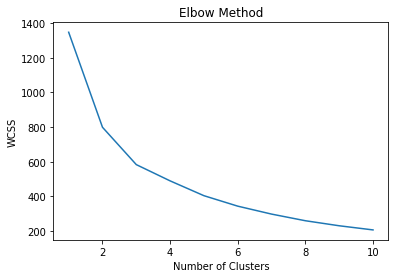

In [48]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
WCSS = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(XPCA)
    WCSS.append(model.inertia_)
plt.plot(range(1, 11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()